# Competição House Prices - Advanced Regression Techniques do Kaggle

In [553]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [531]:
teste = pd.read_csv('test.csv')
base = pd.read_csv('train.csv')

In [532]:
teste.shape

(1459, 80)

In [533]:
print(f'A base de teste tem {teste.shape[0]} linhas e {teste.shape[1]} colunas')
print(f'A base de treino tem {base.shape[0]} linhas e {base.shape[1]} colunas')

A base de teste tem 1459 linhas e 80 colunas
A base de treino tem 1460 linhas e 81 colunas


In [534]:
# Visualizando a % de NaN em cada variável do DataFrame
(base.isna().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [535]:
(teste.isna().sum()/teste.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
dtype: float64

In [536]:
# Retirando as variáveis com mais de 15% de dados NaN
remover_Nan_treino = base.columns[(base.isna().sum()/base.shape[0]) > 0.15]
base.drop(remover_Nan_treino, axis = 1, inplace= True)

In [537]:
remover_Nan_teste = teste.columns[(teste.isna().sum()/teste.shape[0]) > 0.15]
teste.drop(remover_Nan_teste, axis = 1, inplace= True)

In [538]:
remover_object_treino = base.columns[base.dtypes == 'object']
base.drop(remover_object_treino, axis = 1, inplace= True)

In [539]:
remover_object_teste = teste.columns[teste.dtypes == 'object']
teste.drop(remover_object_teste, axis = 1, inplace= True)

In [540]:
# Retirando todas as linhas que contenham dados NaN e a coluna Id
base = base.fillna(-1)
base.reset_index(drop = True, inplace=True)
base.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500


In [541]:
teste = teste.fillna(-1)
teste.reset_index(drop = True, inplace=True)
teste.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010


In [542]:
y = base.SalePrice
X = base.drop('SalePrice', axis = 1)

In [543]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [544]:
arvore_treino = tree.DecisionTreeRegressor(random_state=0).fit(X_treino,y_treino)
y_arvore = arvore_treino.predict(X_teste)

In [545]:
reg_linear = linear_model.LinearRegression().fit(X_treino,y_treino)
y_reg_linear = reg_linear.predict(X_teste)

In [546]:
print(f'Erro quadratico médio árvore de regressão {mean_squared_error(y_teste,y_arvore)}')
print(f'R2 árvore de regressão {arvore_treino.score(X_treino,y_treino)}')

Erro quadratico médio árvore de regressão 2411176389.742009
R2 árvore de regressão 1.0


In [547]:
print(f'Erro quadratico médio regressão linear {mean_squared_error(y_teste,y_reg_linear)}')
print(f'R2 regressão linear {reg_linear.score(X_treino,y_treino)}')

Erro quadratico médio regressão linear 1812210300.123953
R2 regressão linear 0.8445121638886568


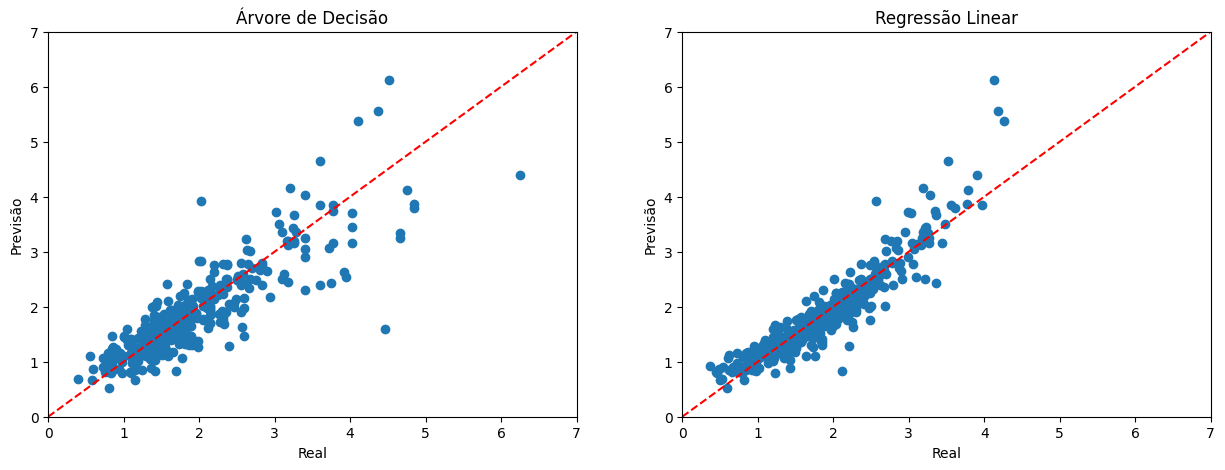

In [548]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(y_arvore/100000,y_teste/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_reg_linear/100000,y_teste/100000)
ax[1].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[0].set_title('Árvore de Decisão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[1].set_title('Regressão Linear')

plt.show()

## Resultado

In [549]:
y_final = reg_linear.predict(teste)
teste['SalePrice'] = pd.DataFrame(y_final)

In [550]:
resultado = teste[['Id', 'SalePrice']]

In [551]:
resultado.to_csv('resultado.csv',index=False)